In [2]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = 'ekEgGJX3YTTb0gqCnCSfft9gg'
consumer_secret = 'kBaF1X7LPus5iwtpbD45JDjXqkKQ6nPjshxDhDIDwJFVgG3uVg'
access_token = '975058023352754176-4j4TtHyndUHzO5cGJ4Pq9UYkC4wpCC0'
access_token_secret = 'QDebGsQV8nwBO3n6rYJ1j6ZItjIRQauFAQhQXocRjips7'

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Target User Account
target_user =        ['@BBCWorld','@CBS','@CNN','@FoxNews','@nytimes']
target_user_color =  ['green','blue','blown','yellow','blue']
#target_user = ['@BBCWorld','@CBS']#,'@CNN','@FoxNews','@nytimes']
get_tweets_needed = 100

# set up a blank df w/ -99 to signal no data written yet.
news_df = pd.DataFrame(index = range(0,get_tweets_needed),columns=target_user, data = -99)
#print(news_df.keys)


Define function to get the sentiment of some number of tweets.

In [3]:
def sentiment_compound_tweets(twitter_handle,number_of_tweets_needed):
    news_compound_score = []
    # Loop through first xxx tweets and save the compound sentiment to the dataframe
    for sp in range(0,10):  #hopefully out of 2000 tweets we can find 100 good ones
        public_tweets = api.user_timeline(twitter_handle, count=200)
        print('-----------------'+twitter_handle)
        #pull each tweet
        for tweet in public_tweets:
            # Run Vader Analysis on each tweet
            #print(tweet["text"])
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            if compound != 0:  #only save the valid (nonZero) compounds
                news_compound_score.append(compound)
                if len(news_compound_score) >= number_of_tweets_needed:
                    return news_compound_score
            

In [4]:
for user in target_user[:]:
    compound_sent = sentiment_compound_tweets(user,get_tweets_needed)
    #print(compound_sent)
    news_df[user] = compound_sent
#print(news_df)           

-----------------@BBCWorld
-----------------@CBS
-----------------@CNN
-----------------@FoxNews
-----------------@nytimes


In [5]:
#news_df.keys()
#news_df['@CBS']

In [6]:
target_user[0]

'@BBCWorld'

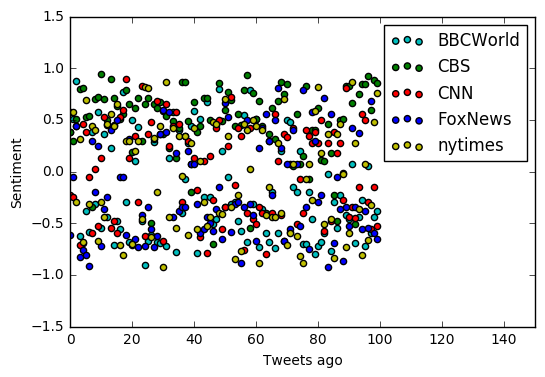

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
news_df['index']= news_df.index
fig = plt.figure()
ax1 = news_df.plot(kind='scatter', x='index' , y = target_user[0],color ='c',label=target_user[0][1:] )
ax2 = news_df.plot(kind='scatter', x=['index'] , y = target_user[1],color ='g',ax = ax1,label=target_user[1][1:] )
ax3 = news_df.plot(kind='scatter', x=['index'] , y = target_user[2],color ='r',ax = ax1,label=target_user[2][1:] )
ax4 = news_df.plot(kind='scatter', x=['index'] , y = target_user[3],color ='b',ax = ax1,label=target_user[3][1:] )
ax5 = news_df.plot(kind='scatter', x=['index'] , y = target_user[4],color ='y',ax = ax1,label=target_user[4][1:] )
plt.xlim(0, 150)
plt.xlabel('Tweets ago')
plt.ylabel('Sentiment')


In [22]:
fig.savefig('c:\\junk\\tweet_history.png', dpi=fig.dpi)

In [8]:

news_df['index']= news_df.index

In [9]:
def autolabel(rects, ax,y_values):
    #http://composition.al/blog/2015/11/29/a-better-way-to-add-labels-to-bar-charts-with-matplotlib/
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom
    for rect,i in zip(rects,range(0,len(y_values))):
        height = rect.get_height()
        direction = np.sign(y_values[i])
        #ax.text(rect.get_x() + rect.get_width()/2., 5*direction,'%d%%' % int(height))
        ax.text(rect.get_x() + rect.get_width()/3., .05, '%.2f' % y_values[i])

@BBCWorld    -0.198332
@CBS          0.473189
@CNN          0.025476
@FoxNews     -0.168574
@nytimes     -0.037330
index        49.500000
dtype: float64

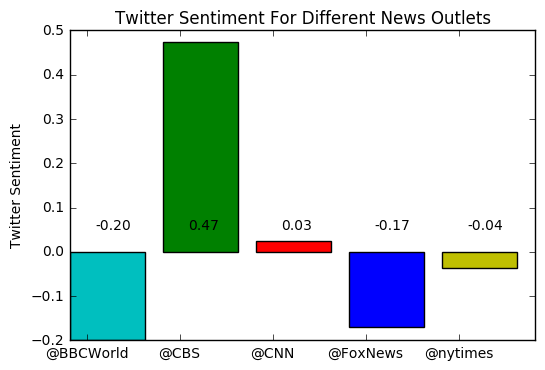

In [13]:
compound_news_means = news_df.mean()
ind = np.arange(len(target_user))  # the x locations for the groups
width = 0.35       # the width of the bars


fig, ax = plt.subplots()
bar_color = ['c','g','r','b','y']

#percent_vol_change[drugs].plot(kind='bar',color=bar_color)
rects1 = ax.bar(range(0,len(compound_news_means[:-1])),list(compound_news_means[:-1]),color=bar_color)

ax.set_xlabel(' ')
ax.set_ylabel('Twitter Sentiment')
ax.set_title('Twitter Sentiment For Different News Outlets')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(target_user)

autolabel(rects1, ax, list(compound_news_means[:-1]))


In [15]:
fig.savefig('c:\\junk\\news_sentiment_summary.png', dpi=fig.dpi)

Observations:
1) CBS is much more positive than the population of BBC, CNN, and NY Times
2) BBC world is the most negative.  They likely just publish the large bad stories from around the world.
3) The stories tend to be bimodal in sentiment as good or bad. The wonderful normal day is not news worthy, but it is likely the normal.